# Implementing Histograms of Oriented Edges and Textures for Image Matching
Final Project Report

Author: Jose G. Perez

Course: EE5372 - Digital Image Processing, Fall 2021 Semester

## Abstract


## 1. Introduction and Topic Description
Image Matching or Content-Based Image Retrieval is a problem in computer vision where given an input query image we try to find the closest matching image (or images) in a database. This is a widely studied problem and although most efforts began with the feature extraction methods covered in DIP4e Chapter 11 research has mostly shifted to neural network approaches in recent years. There are two main variations of this problem, homogeneous and heterogeneous matching. In homogeneous matching the query image being searched and the database images are assumed to be captured using similar sensors, usually a regular camera that captures RGB (red, green, blue) values from the scene. In contrast, for heterogenous matching we cannot make any assumptions on the nature of the sensors used to capture the data which makes matching more difficult. 

A common approach for this problem is feature-based matching. In feature-based matching, the main idea is that we want to somehow extract the meaningful intrinsic characteristics (features) of an image from its raw pixel data and use that to compare images to each other. Concretely, that means that we extract features from an image, and then we convert those features into vectors (feature descriptors) which we can then compare with metrics such as Euclidean distance or Cosine similarity. Thus, there are two main components to feature-based matching: Feature Extractors which extract meaningful features from an image and Feature Descriptors which are able to convert those features into vector representations.

## 2. Related Works
A lot of different feature extractor and descriptor algorithms have been proposed for this task in the past. We can roughly divide the approaches into two categories: traditional computer vision approaches for hand-crafted features and machine learning approaches. 

### Hand-Crafted Features (Traditional Approaches)
As a starting point for comparing images we first need to understand the basics of how images are represented in the computer and how to process those images. This is what is now called the area of Digital Image Processing. This field has been actively developing since before the 70s and thus there is extensive work in different ways to extract meaningful features from images such as edges, "blobs" or similar regions, lines, corners, textures, and colors. 

One of the most well known and most popular approach to extract edges is the Canny Edge Detector which was developed in 1986 and required the use of edge detection operators such as Roberts (1963), Prewitt (1970), or Sobel (1986). For "blob" detection to find similar regions, the Laplacian of the Gaussian (LoG) proposed in the Marr-Hildreth algorithm from 1980 and Difference of Gaussians (DoG) were also popular approaches. For line or "ridge" detection, the Hough transform proposed in 1972 was a very popular approach at the time. Any of these approaches individually or as a combination can be used as features for a feature-based algorithm, and so in the late 1980s one of the first feature extractors named the Histograms of Oriented Gradients (HOG) for object detection was proposed based on edge intensity gradients. However, the most widely recognized and used feature detector and extraction algorithm from that era is the Scale Invariant Feature Transform (SIFT) proposed by David Lowe in 1999 which uses a plethora of combinations of previously proposed features. After SIFT became popular many different variations, alternatives, and improvements were proposed such as Speeded Up Robust Features (SURF), Gradient Location and Orientation Histogram (GLOH), Affine Invariant SIFT (ASIFT), Normalized Gradient SIFT (NG-SIFT), Synthetic Aperture Radar SIFT (SAR-SIFT), and many more.

### Machine Learning Approaches
As machine learning and specifically deep learning approaches have achieved state-of-the-art results in many image related tasks, there have been many proposed approaches to automatically determine and extract meaningful features from an image based on neural networks. The most widely used and state-of-the-art methods are all based around Convolutional Neural Networks (CNNs) which are capable of automatically learning feature descriptors which outperform most hand-crafted traditional approaches as CNN-descriptors are more specialized to the data we have and not general like the traditional approaches. Since this is a digital image processing class, I will not go into detail in the algorithms and approaches in this area.

## 3. Project Goals
For my project I proposed implementing a state-of-the-art feature extraction algorithm called "Histogram of Oriented Edges and Textures (HOET)" which was published in October 2021 and using it on different datasets including my neuroscience rat brain datasets for solving the problem of image matching. Broadly, my goals can be seen as follows:

1. Implement the edge extractor proposed in HOET
2. Implement the texture extractor proposed in HOET
3. Test HOET using the CIFAR-10 dataset which is a widely recognized benchmark dataset for image processing
4. Test HOET in the neuroscience rat brain datasets
5. Compare HOET against SIFT

## 4. Methodology

### Histogram of Oriented Edges and Textures
The Histogram of Oriented Edges and Textures (HOET) is based on two main feature extractors: An edge extractor in the spatial domain, and a texture extractor in the frequency domain.

The edge extractor works by using Sobel operators in four directions to construct "directional response maps" (DMs). These are created by convolving the image with each Sobel operator, applying Gaussian filtering afterwards, and then taking the absolute value of that result. The image is divided into regions called blocks, and a feature vector is computed for each block based on the convolved DMs. L2 normalization is applied for each feature vector in each block.

The texture extractor works by using the 2D log-Gabor filter which is obtained by using a Gaussian function in the angular direction of the regular log-Gabor filter. As the log-Gabor filter is a frequency domain filter, inverse Fourier transform is used to obtain a corresponding spatial domain filter which can then be used for convolution. The amplitude component is then defined as the convolution between the 2D spatial log-Gabor filter and the original image. As the filter produces multiple scales and orientations, for each orientation all amplitudes of different scales are added together, and then the argmax function is used on the output of that to get the Maximum Index Map (MIM) which is then split into 6x6 regions for which the histogram is computed individually. All histograms are then concatenated together into one vector, which is also normalized with L2 norm.

The final HOET feature vector is the concatenation of the edge feature vector and texture feature vector.

### Image Similarity Matching
Given a query image $I_{query}$ we want to find the most similar image $I_{sim}$ in a $database = [I_{0}, ..., I_{n}]$ which has $n$ images. First we need to perform feature extraction on both the query image and all the database images so we can get the "keypoints" of interest in each image. There are different ways of doing this, such as using the extractor built inside SIFT or by randomly sampling from the images. In this paper we opt to do a simple uniform sampling of the image as the main point of interest is the comparison between the feature descriptors not the extractors. That means that for each image $I(x,y)$ of size $w x h$, we uniformly take the pixels by a specified sampling interval, giving us the image $I_{kp}$. Afterwards, we feed this image into a feature description algorithm which produces a vector $v_{des}$. For each image in the $database$, we pre-compute and store the feature descriptors and create a descriptor database to speed-up the look-up time. To find the most similar images we perform Euclidean distance between the query image descriptor and all the database descriptors and the one with the smallest distance is taken to be the most similar image. This is also known as Nearest Neighbors Classification with neighbors=1. For my experiments, I use a faster algorithm implementing K-Nearest Neighbors for faster computational speed.

### Evaluation of HOET in the CIFAR-10 dataset
The CIFAR-10 dataset is a widely known benchmark used to test computer vision algorithms. It consists of 32x32 sized color images of 10 different classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The dataset is labeled and split between training and testing datasets. I use this dataset for an initial evaluation of my implementation of HOET to make sure the results make sense.

### Evaluation of HOET in neuroscience rat brain datasets
There are two main datasets used in rat brain neuroscience: The Swanson Atlas, and the Paxinos & Watson Atlas. They consist of images of rat brain slices captured with a microscope camera that have all the regions of the rat brain labeled. They are also stained with Nissl, which colors the DNA in cells, and therefore the pixels of the images mostly represent cell nuclei. The images are not consistent in width, height, or resolution across atlases, therefore some preprocessing was done to resize them all to the same size.

### Comparison of HOET against SIFT
As the image similarity matching algorithm described in an earlier section of the methodology is general, it works with any feature descriptor algorithm. Therefore I use it for both HOET and SIFT and compare the results for both of them.

## 5. Experiments and Results

### HOET Edge Extractor and Texture Extractor Experiments
To make sure my implementation of HOET made sense, I visualized some of the intermediate results.

In [22]:
import os
import keras
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

import hoet

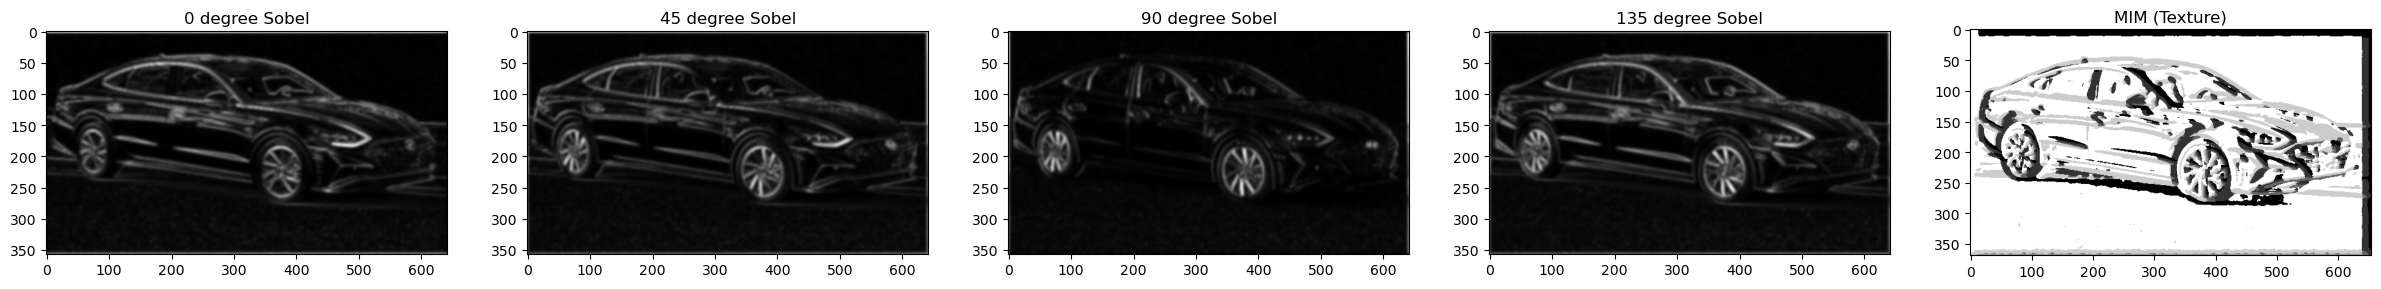

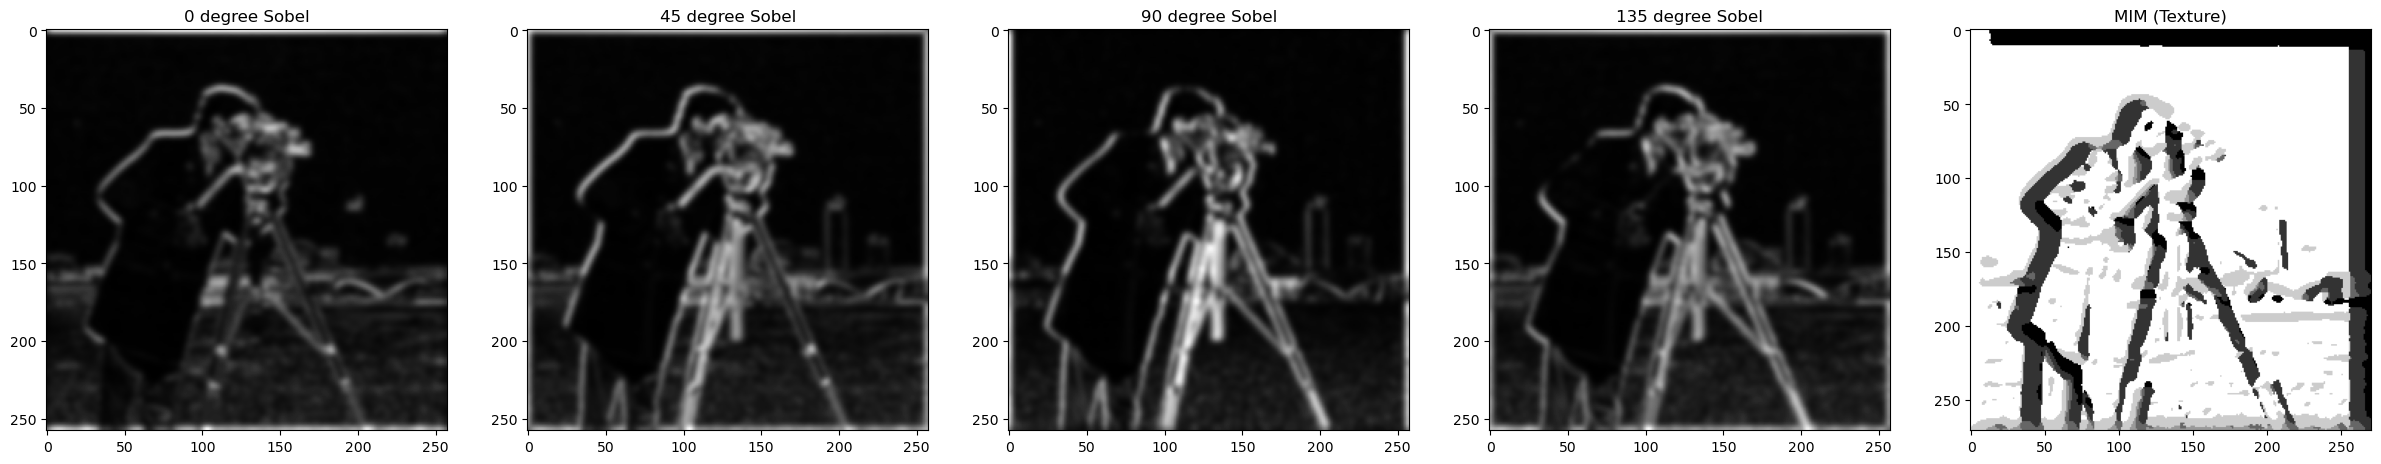

In [13]:
for filename in ['car.jpg', 'photographer.jpg']:
    # Read the image and convert to grayscale if needed
    im = np.array(Image.open(filename))
    if len(im.shape) == 3:
        im = np.mean(im, axis=2)

    # Extractors
    edge_vector, DM_list = hoet.__edge_descriptor__(im, cell_size=16, sigma=2, gaussian_before=False)
    texture_vector, MIM = hoet.__texture_descriptor__(im, N=16)

    # Visualize
    fig, ax = plt.subplots(1, 5, figsize=(30, 10))

    ax[0].imshow(DM_list[0], cmap='gray')
    ax[0].set_title(hoet.SOBEL_TITLES[0])

    ax[1].imshow(DM_list[1], cmap='gray')
    ax[1].set_title(hoet.SOBEL_TITLES[1])

    ax[2].imshow(DM_list[2], cmap='gray')
    ax[2].set_title(hoet.SOBEL_TITLES[2])

    ax[3].imshow(DM_list[3], cmap='gray')
    ax[3].set_title(hoet.SOBEL_TITLES[3])

    ax[4].imshow(MIM, cmap='gray')
    ax[4].set_title('MIM (Texture)')

plt.show()

### CIFAR-10 Experiments


In [20]:
# Experiment variables
CELL_SIZE = 16
SIGMA = 0
GAUSSIAN_BEFORE = False
N = 2
SAMPLING_INTERVAL = 64

# Load the data
database_filename = f'db_hoet_{CELL_SIZE}_{SIGMA}_{GAUSSIAN_BEFORE}_{N}_{SAMPLING_INTERVAL}.npz'

if not os.path.exists(database_filename):
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

    x1_hoet = []
    for x in tqdm(x_train[:5], desc='Pre-Computing HOET for CIFAR-10 (Train)'):
        x1_hoet.append(hoet.get_descriptor(np.mean(x, axis=2), cell_size=CELL_SIZE, sigma=SIGMA, gaussian_before=GAUSSIAN_BEFORE, n_scales=4, n_orientations=6, N=N, sampling_interval=SAMPLING_INTERVAL))

    x2_hoet = []
    for x in tqdm(x_test[:5], desc='Pre-Computing HOET for CIFAR-10 (Test)'):
        x2_hoet.append(hoet.get_descriptor(np.mean(x, axis=2), cell_size=CELL_SIZE, sigma=SIGMA, gaussian_before=GAUSSIAN_BEFORE, n_scales=4, n_orientations=6, N=N, sampling_interval=SAMPLING_INTERVAL))

    x1_hoet = np.array(x1_hoet)
    x2_hoet = np.array(x2_hoet)

    y_train = y_train.reshape(-1)
    y_test = y_test.reshape(-1)

    np.savez_compressed(database_filename, x_train=x1_hoet, y_train=y_train, x_test = x2_hoet, y_test = y_test)
else:
    data = np.load(database_filename)
    x_train, y_train, x_test, y_test = data['x_train'], data['y_train'], data['x_test'], data['y_test']

print(x_train[0])

[0.06477328 0.         0.        ]


In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X1, Y1)

y_pred = model.predict(X2)
print(classification_report(Y2, y_pred))

## Conclusion

## References

## Appendix

In [3]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import hoet

In [16]:
im = np.array(Image.open('photographer.jpg'))
if len(im.shape) == 3:
    im = np.mean(im, axis=2)

im = im.astype(np.uint8)
print(f'Image Info: Shape={im.shape}, Dtype={im.dtype}')

# d = hoet.get_descriptor(im, cell_size=16, sigma=2, gaussian_before=True, n_scales=4, n_orientations=6, N=16)
# plt.show()

Image Info: Shape=(256, 256), Dtype=uint8


In [24]:
sift.compute(im)

error: OpenCV(4.5.4) :-1: error: (-5:Bad argument) in function 'compute'
> Overload resolution failed:
>  - Feature2D.compute() missing required argument 'keypoints' (pos 2)
>  - Feature2D.compute() missing required argument 'keypoints' (pos 2)
>  - Feature2D.compute() missing required argument 'keypoints' (pos 2)
>  - Feature2D.compute() missing required argument 'keypoints' (pos 2)


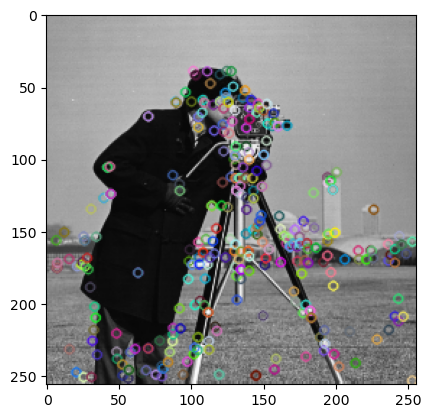

In [17]:
import cv2 as cv

sift = cv.SIFT_create()
kp = sift.detect(im, None)
img=cv.drawKeypoints(im,kp, im)

plt.imshow(img)
plt.show()

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print(x_train.shape)

(50000, 32, 32, 3)


In [17]:
print(x_test.shape)

(10000, 32, 32, 3)


In [14]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

CELL_SIZE = 16
SIGMA = 0
N = 2
SAMPLING_INTERVAL = 64

query_idx = 0
query_im = np.mean(x_train[query_idx], axis=2)

print(f'Looking for the closest match to {class_names[y_train[query_idx][0]]}, query_idx={query_idx}')
d = hoet.get_descriptor(query_im, cell_size=CELL_SIZE, sigma=SIGMA, gaussian_before=False, n_scales=4, n_orientations=6, N=N, sampling_interval=SAMPLING_INTERVAL)

distances = []
lbls = [i for i in range(0, 20) if i != query_idx]
print(f'There are {len(lbls)} images in the database')
for i in lbls:
    d2 = hoet.get_descriptor(np.mean(x_train[i], axis=2), cell_size=CELL_SIZE, sigma=SIGMA, gaussian_before=False, n_scales=4, n_orientations=6, N=N, sampling_interval=SAMPLING_INTERVAL)
    curr_l = class_names[y_train[i][0]]

    distances.append(np.linalg.norm(d2 - d))

print([f'{distances[idx]}:{class_names[y_train[lbls[idx]][0]]}' for idx in range(len(lbls))])

best_idx = np.argmin(distances)
best_lbl = lbls[best_idx]
best_y = y_train[best_lbl]
best_x = x_train[best_lbl]
print(f'Closest match is: {distances[best_idx]} which has a label of {class_names[best_y[0]]}')

# plt.figure()
# plt.imshow(query_im, cmap='gray')
# plt.show()

# plt.figure()
# plt.imshow(best_x, cmap='gray')
# plt.show()

Looking for the closest match to frog, query_idx=0
There are 19 images in the database
['0.12721215498696786:truck', '0.05144779641825118:truck', '0.27898444362244645:deer', '0.027137720254433693:automobile', '0.17038880727500272:automobile', '0.4198957921036555:bird', '0.08405601315355306:horse', '0.3946735562985065:ship', '0.5506400225961932:cat', '0.12808641461076503:deer', '0.06096576160846483:horse', '0.25748994522478547:horse', '0.1852034788668409:bird', '0.01451974186307757:truck', '0.030229477338969267:truck', '0.362150771491907:truck', '0.08890172340960693:cat', '0.27797045500916395:bird', '0.004383494995629983:frog']
Closest match is: 0.004383494995629983 which has a label of frog


In [37]:
from sklearn.neighbors import KNeighborsClassifier

CELL_SIZE = 16
SIGMA = 0
N = 2
SAMPLING_INTERVAL = 1


X1 = []
Y1 = y_train[0:1000]
for i in range(1000):
    X1.append(hoet.get_descriptor(np.mean(x_train[i], axis=2), cell_size=CELL_SIZE, sigma=SIGMA, gaussian_before=False, n_scales=4, n_orientations=6, N=N, sampling_interval=SAMPLING_INTERVAL))

X2 = []
Y2 = y_test[0:1000]
for i in range(1000):
    X2.append(hoet.get_descriptor(np.mean(x_test[i], axis=2), cell_size=CELL_SIZE, sigma=SIGMA, gaussian_before=False, n_scales=4, n_orientations=6, N=N, sampling_interval=SAMPLING_INTERVAL))

X1 = np.array(X1)
Y1 = np.array(Y1).reshape(-1)

X2 = np.array(X2)
Y2 = np.array(Y2).reshape(-1)

print(X1.shape, Y1.shape)

(1000, 166) (1000,)


In [38]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X1, Y1)

from sklearn.metrics import classification_report
y_pred = model.predict(X2)
print(classification_report(Y2, y_pred))

              precision    recall  f1-score   support

           0       0.13      0.24      0.17       103
           1       0.09      0.17      0.12        89
           2       0.13      0.14      0.14       100
           3       0.14      0.11      0.12       103
           4       0.18      0.17      0.17        90
           5       0.19      0.16      0.18        86
           6       0.14      0.11      0.12       112
           7       0.18      0.13      0.15       102
           8       0.25      0.21      0.23       106
           9       0.16      0.08      0.11       109

    accuracy                           0.15      1000
   macro avg       0.16      0.15      0.15      1000
weighted avg       0.16      0.15      0.15      1000



In [6]:
print(d)
print(curr_l, d2)
print(np.linalg.norm(d - d2))

[0.08329908 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01961208 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.02941812
 0.         0.         0.         0.         0.         0.02614944
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00762692
 0.         0.         0.       

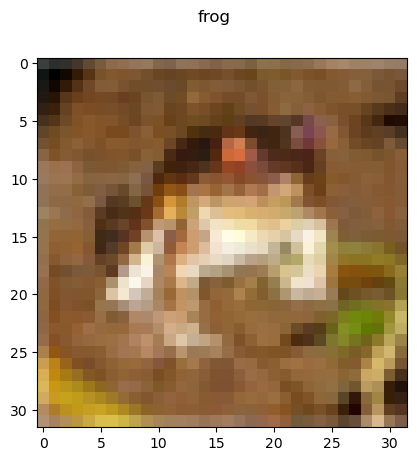

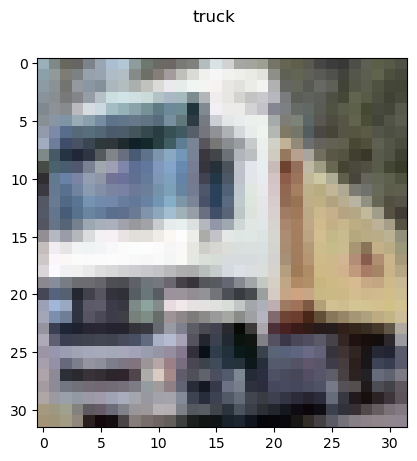

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(2):
    plt.suptitle(class_names[y_train[i][0]])
    plt.imshow(x_train[i])
    plt.show()